In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Introduction
============

Many processes in science are random, like radioactive decay or the occurence of random mutations in biology driving
natural selection.  Some processes are not truly random but are so complex and involve so many variables that we
can treat them as effectively random.  Brownian motion of particles in a gas, or the voting behavior of political
constituants may be examples of these types of processes.  Thus there are many instances where we would like to 
model and better understand these processes that have random (or effectively random) behaviors built into the
systems.

To make programs simulate random processes and behave randomly we use *random numbers*.  Technically, in fact,
we use *pseudorandom* numbers, which are not really random.  They only look random (by statistical tests) but
are in fact the products of a deterministic sequence of calculations.  The formula for generating good sequences
of random numbers are known as *random number generators*.  In fact, such formula can be thought of as generating
infinite sequences, of the type we have studied previously, and they can be specified using difference equation
or recurrence relationship notation.

Random Number Generators
------------------------

Consider the following recurrence relationship:

$$
x_{n+1} = (a x_n + c) \; \textrm{mod} \; m
$$

Here $a$, $c$ and $m$ are integer constants that we have to determine values for, and $x$ is an integer
variable.  The $\textrm{mod}$ function performs the modulus operation (e.g. returns the remainder from
doing an integer division).  Besides choosing values for the parameters, we also have to pick an
initial value $x_0$ for the $x$ variable.

Here is a program in Python that generates the first 100 terms of the defined sequence:

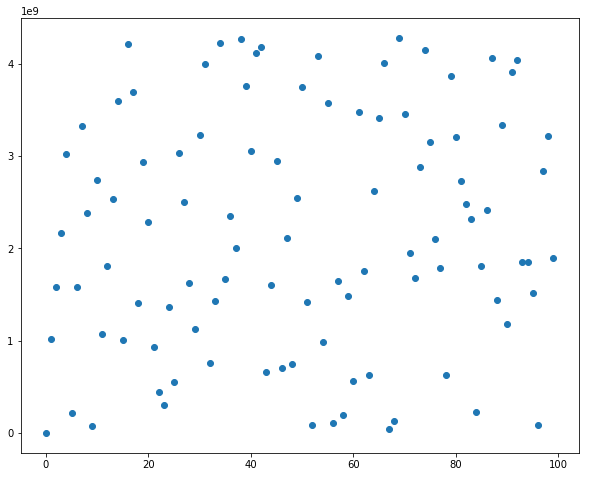

In [2]:
N = 100
x = np.zeros(N) # x_n values will be calculated here
x[0] = 1 # x_0, the initial value of sequence

# the parameters for our pseudorandom sequence generator
a = 1664525
c = 1013904223
m = 4294967296

for i in range(1, N):
    x[i] = (a * x[i-1] + c) % m
    
# visualize the resulting sequence
plt.figure(figsize=(10,8))
plt.plot(x, "o")

You should notice from the figure that the numbers being generated appear pretty random (noisy).  If we generated a lot more of
them, the figure would look like noise. 

This sequence is known as a *linear congruential random number generator*.  It generates a string of apparently random integers, 
one after another, simply by iterating the same equation over and over.  It is probably the most famous of random number 
generators.  But note:

1. First it is obviously not actually random.  You know the recurrence relationship used to generate the sequence.  Given the
parameters and the current value of $x$, you can predict with perfect accuracy what the next value of $x$ will be.  If we
run this program twice, starting with the same initial value $x_0 = 1$, the program will produce exactly the same sequence.
Nonetheless, the numbers generated may be "sufficiently random" to use them to model random processes.
2. The numbers generated are always positive (or zero), and because they are calculated modulo $m$, they are always less
than $m$.  Thus all the numbers generated fall in the range from $0$ to $m - 1$.  
3. It matters what values are chosen for the constants $a$, $c$ and $m$.  The values used in the above example
program were not chosen arbitrarily, but were selected with some care.  These particular values for the parameters
have been widely tested and are known to work well.  However, other choices for the parameters do not work as well,
or at all.  For example, if $c$ and $m$ were both chosen to be even, then the process would only generate even numbers or only oddd
numbers (try it yourself), but not both, which is obviously not very random.  Other choices might not have such
obvious defects, but can give poor results in more subtle ways.
4. For a particular choice of the constants $a$, $c$ and $m$ you can still get different sequences of random numbers by
simply choosing a different starting value for $x_0$.  The initial value in this context is known as the *seed* for the
pseudorandom number generator, it specifies where the sequence will start.

The linear congruential generator returns pseudorandom numbers that are suitable for simple scientific simulations
involving randomness (providing you choose the parameters carefully).  However, the linear congruential generator
also has some serious flaws.  It turns out that, even with the best selection of parameters, there are still statistical
correlations between the subsequent numbers this sequence generates.  Truly random numbers display no correlations
between subsequent values being produced.  These correlations can cause errors (from the obvious to the very subtle) if used
in some types of serious scientific modeling of random processes and systems.  Therefore for serious work in
computational science it is important that we use high-quality random numbers with little or no correlations, and for such
work the linear congruential generator is not good enough.

Luckily there are many other random number generators that give numbers of higher quality than the linear congruential
generator.  The generator of choice in many contexts these days is known as the *Mersenne twister* which is a
"generalized feedback shift-register generator."  The Mersenne twister is quite complicated to program, but
fortunately we don't have to program it, because Python (and most other high-level programming languages) provide a
version for us.  It comes in the `random` and the `np.random` packages and is used as the basic function to generate
sequences of random numbers when any library function producing random numbers from these libraries is used (See Lecture 13).

# Versions

In [3]:
%load_ext version_information

%version_information numpy, scipy, matplotlib

Software versions
Python 2.7.13 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 5.3.0
OS Linux 4.13.0 32 generic x86_64 with debian stretch sid
numpy 1.13.1
scipy 0.19.1
matplotlib 2.0.2
Mon Feb 19 11:31:36 2018 CST